# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
%matplotlib inline
from scipy import stats
import seaborn as sns
sns.set_style("darkgrid", {"axes.facecolor": ".96"})

import warnings
warnings.filterwarnings('ignore')

In [2]:
bmi_raw = pd.read_csv('BMI.csv')
print(bmi_raw.shape)
# NaN values check
print()
print(bmi_raw.isna().sum())

(2111, 17)

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [3]:
print(bmi_raw.duplicated().sum())

24


In [4]:
bmi_raw = bmi_raw.drop_duplicates()
print(bmi_raw.duplicated().sum())

0


In [5]:
bmi_raw.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


### Creating target variable

I decided to replace the categorical target variable NObeyesdad with the continuous variable BMI, which allows for more accurate predictions and better captures subtle patterns.

In [6]:
# Creating new target variable
bmi_raw["BMI"] = bmi_raw["Weight"]/(bmi_raw["Height"]**2)

In [7]:
# Drop features that directly determine the target (to avoid data leakage)
bmi_raw = bmi_raw.drop(columns=["NObeyesdad", "Weight", "Height"])

In [8]:
bmi_raw.dtypes

Gender                             object
Age                               float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
BMI                               float64
dtype: object

In [9]:
# Identify binary features for future transformation
binary_columns = bmi_raw.nunique() == 2
binary_columns = binary_columns[binary_columns].index.tolist()
binary_columns

['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']

In [10]:
# rename column names for better readability
bmi_raw = bmi_raw.rename(columns= 
    {
    "Gender": "gender",
    "Age": "age",  
    "FAVC": "frequent_high_calorie_food",      # Do you eat high-calorie food frequently?
    "FCVC": "vegetable_consumption_freq",      # Do you usually eat vegetables in your meals?
    "NCP": "main_meals_per_day",               # Number of main meals
    "CAEC": "eating_between_meals",            # Do you eat any food between meals?
    "CH2O": "water_intake",                    # How much water do you drink daily?
    "SCC": "calorie_monitoring",               # Do you monitor the calories you eat?
    "FAF": "physical_activity_freq",           # How often do you have physical activity?
    "TUE": "screen_time",                      # Time using technology devices
    "CALC": "alcohol_consumption",             # How often do you drink alcohol?
    "MTRANS": "transportation_type",           # Which transportation do you usually use?
    "SMOKE": "smoke",                          # Do you smoke? 
    "BMI": "bmi"
    }
)
bmi_raw.head()

,gender,age,family_history_with_overweight,frequent_high_calorie_food,vegetable_consumption_freq,main_meals_per_day,eating_between_meals,smoke,water_intake,calorie_monitoring,physical_activity_freq,screen_time,alcohol_consumption,transportation_type,bmi
0,Female,21.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,24.386526
1,Female,21.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,24.238227
2,Male,23.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,23.765432
3,Male,27.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,26.851852
4,Male,22.0,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,28.342381


In [11]:
bmi_raw.describe()

,age,vegetable_consumption_freq,main_meals_per_day,water_intake,physical_activity_freq,screen_time,bmi
count,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000
mean,24.353090,2.421466,2.701179,2.004749,1.012812,0.663035,29.765758
std,6.368801,0.534737,0.764614,0.608284,0.853475,0.608153,8.024934
min,14.000000,1.000000,1.000000,1.000000,0.000000,0.000000,12.998685
25%,19.915937,2.000000,2.697467,1.590922,0.124505,0.000000,24.368897
50%,22.847618,2.396265,3.000000,2.000000,1.000000,0.630866,28.896224
75%,26.000000,3.000000,3.000000,2.466193,1.678102,1.000000,36.095538
max,61.000000,3.000000,4.000000,3.000000,3.000000,2.000000,50.811753


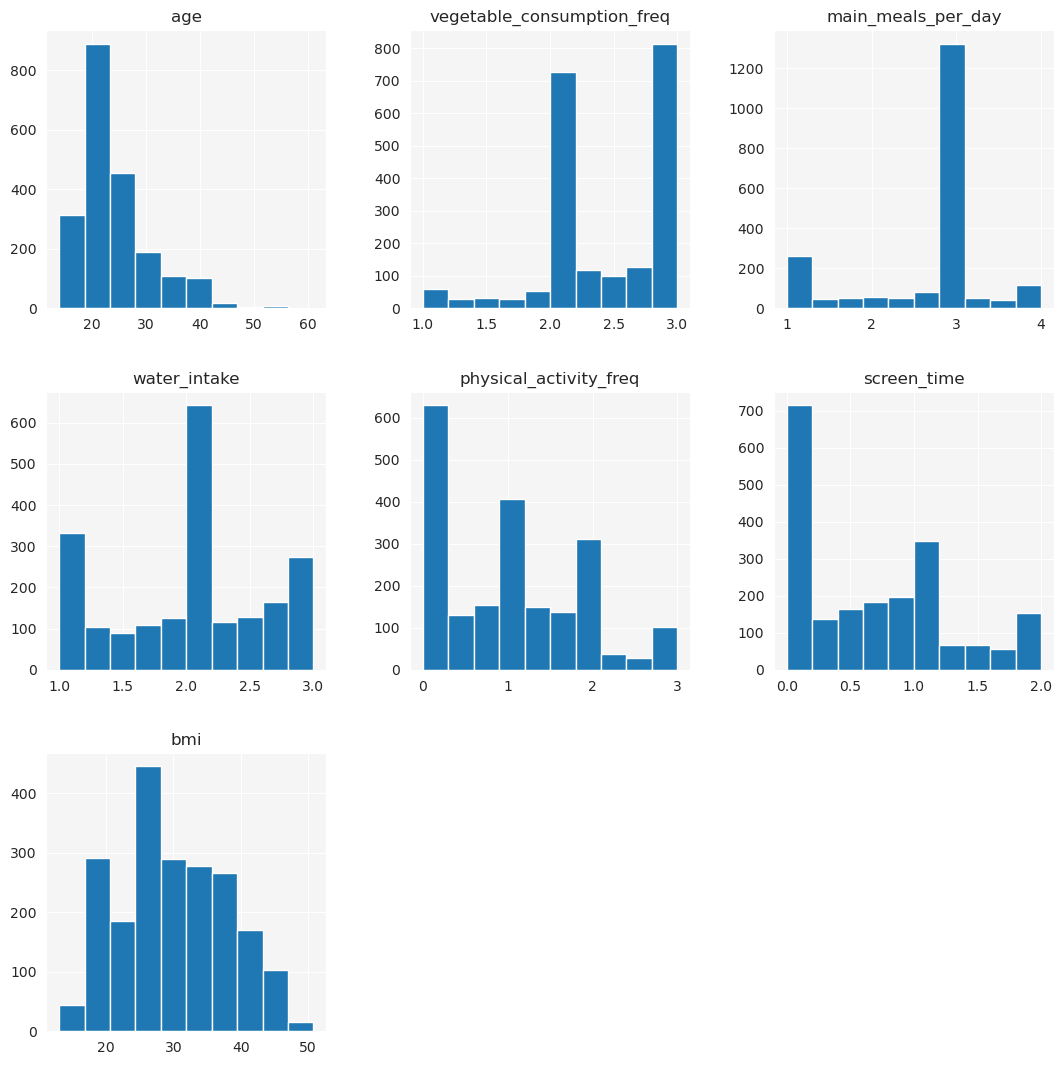

In [12]:
bmi_raw.hist(figsize=(13,13))
plt.show()

Dataset contains a few heavily quantized/discretized variables, but this should not be a problem for basic regression algorithms.

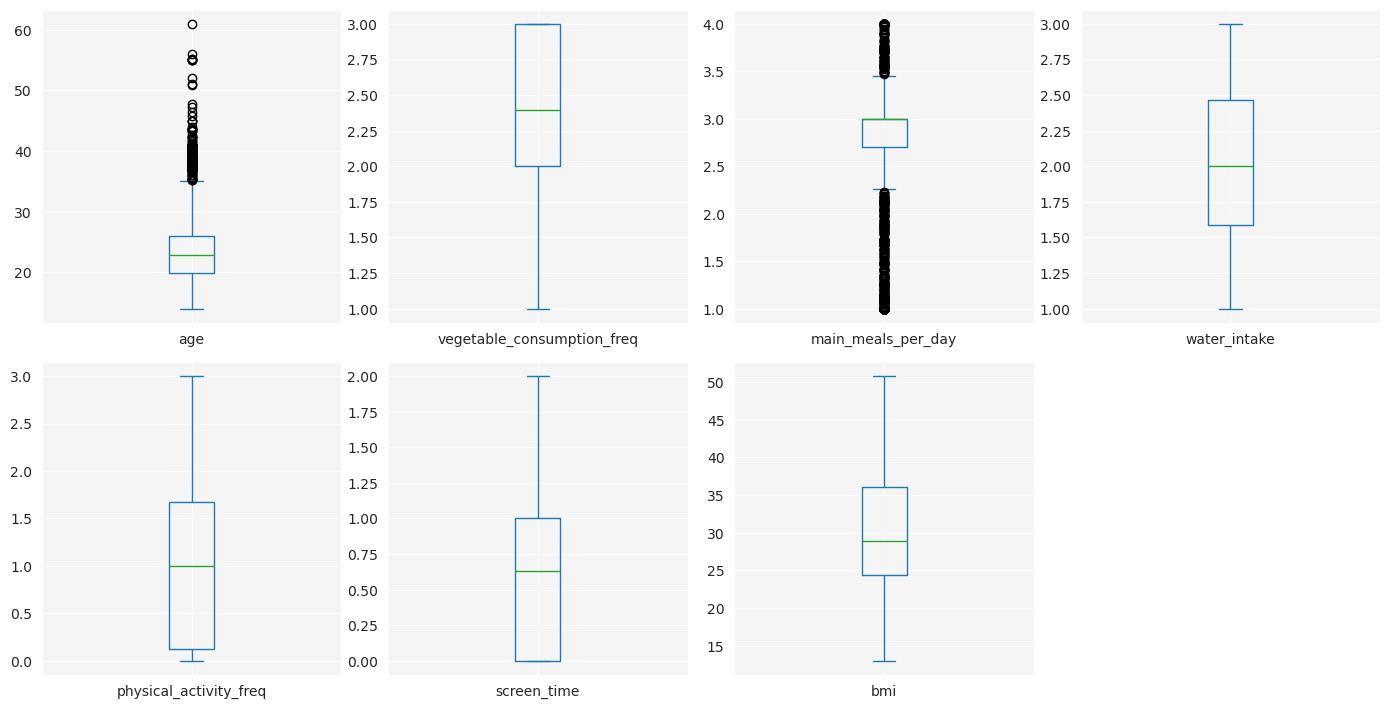

In [13]:
bmi_raw.plot(kind='box', figsize=(14,14), subplots=True, layout=(4,4), 
             sharex=False, sharey=False)
plt.tight_layout()  
plt.show()

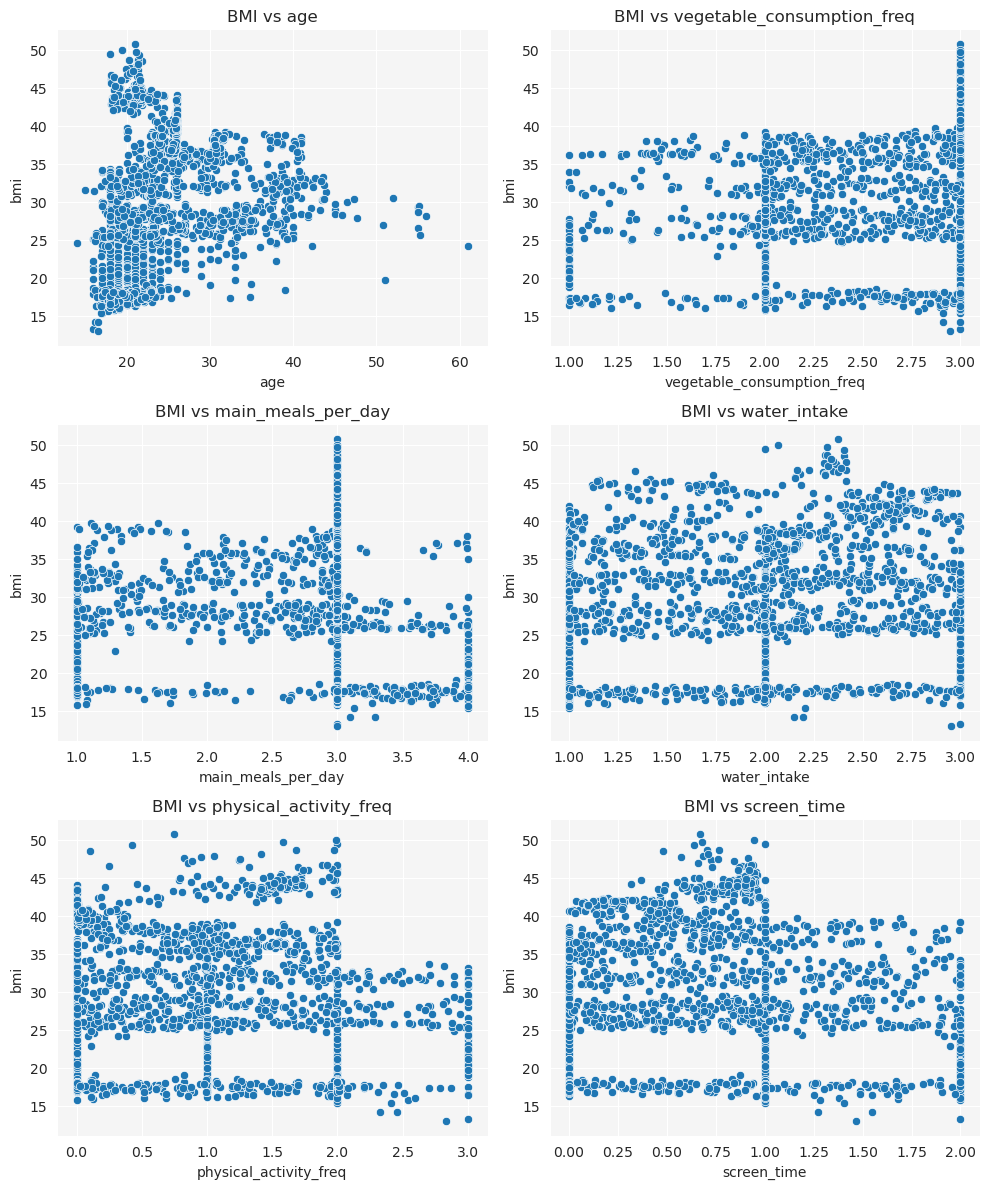

In [14]:
numeric_df = bmi_raw.select_dtypes(include='number')
cols_to_plot = [col for col in numeric_df if col != 'bmi']

cols_per_row = 2
n = len(cols_to_plot)
rows = math.ceil(n / cols_per_row)

fig, axes = plt.subplots(rows, cols_per_row, figsize=(5*cols_per_row, 4*rows))
axes = axes.flatten()

for i, col in enumerate(cols_to_plot):
    sns.scatterplot(data=bmi_raw, x=col, y='bmi', ax=axes[i])
    axes[i].set_title(f'BMI vs {col}')

plt.tight_layout()
plt.show()


There is barely visible any corellation with with the "bmi" variable with the expception of "age". Also there are only 8 values in the "age" above 50, causing prediction for peaple afte 50 may be unreliable.

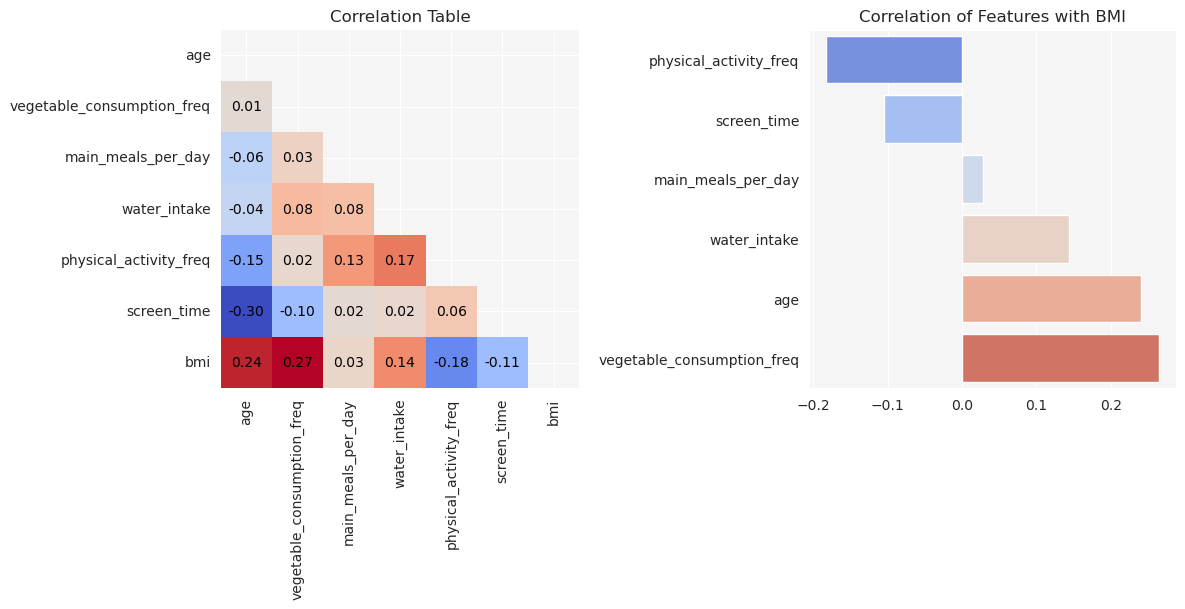

In [15]:
corr = numeric_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

corr_with_bmi = numeric_df.corr()['bmi'].drop('bmi')  
corr_with_bmi_sorted = corr_with_bmi.sort_values()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))  

sns.heatmap(
    corr, 
    mask=mask, 
    robust=True, 
    center=0, 
    square=True, 
    cmap="coolwarm", 
    ax=axes[0],
    annot=True,         
    fmt=".2f",          
    annot_kws={"size":10, "color":"black"},
    cbar=False 
)

axes[0].set_title('Correlation Table')

sns.barplot(
    x=corr_with_bmi_sorted.values,
    y=corr_with_bmi_sorted.index,
    palette=sns.color_palette("coolwarm", len(corr_with_bmi_sorted)),
    ax=axes[1]       
)
axes[1].set_title('Correlation of Features with BMI')
axes[1].set_xlabel('')
axes[1].set_ylabel('')
    
plt.tight_layout()
plt.show()

Correlations table confirms low level of correlation, suggesting linear model may not be appripriate for this dataset.

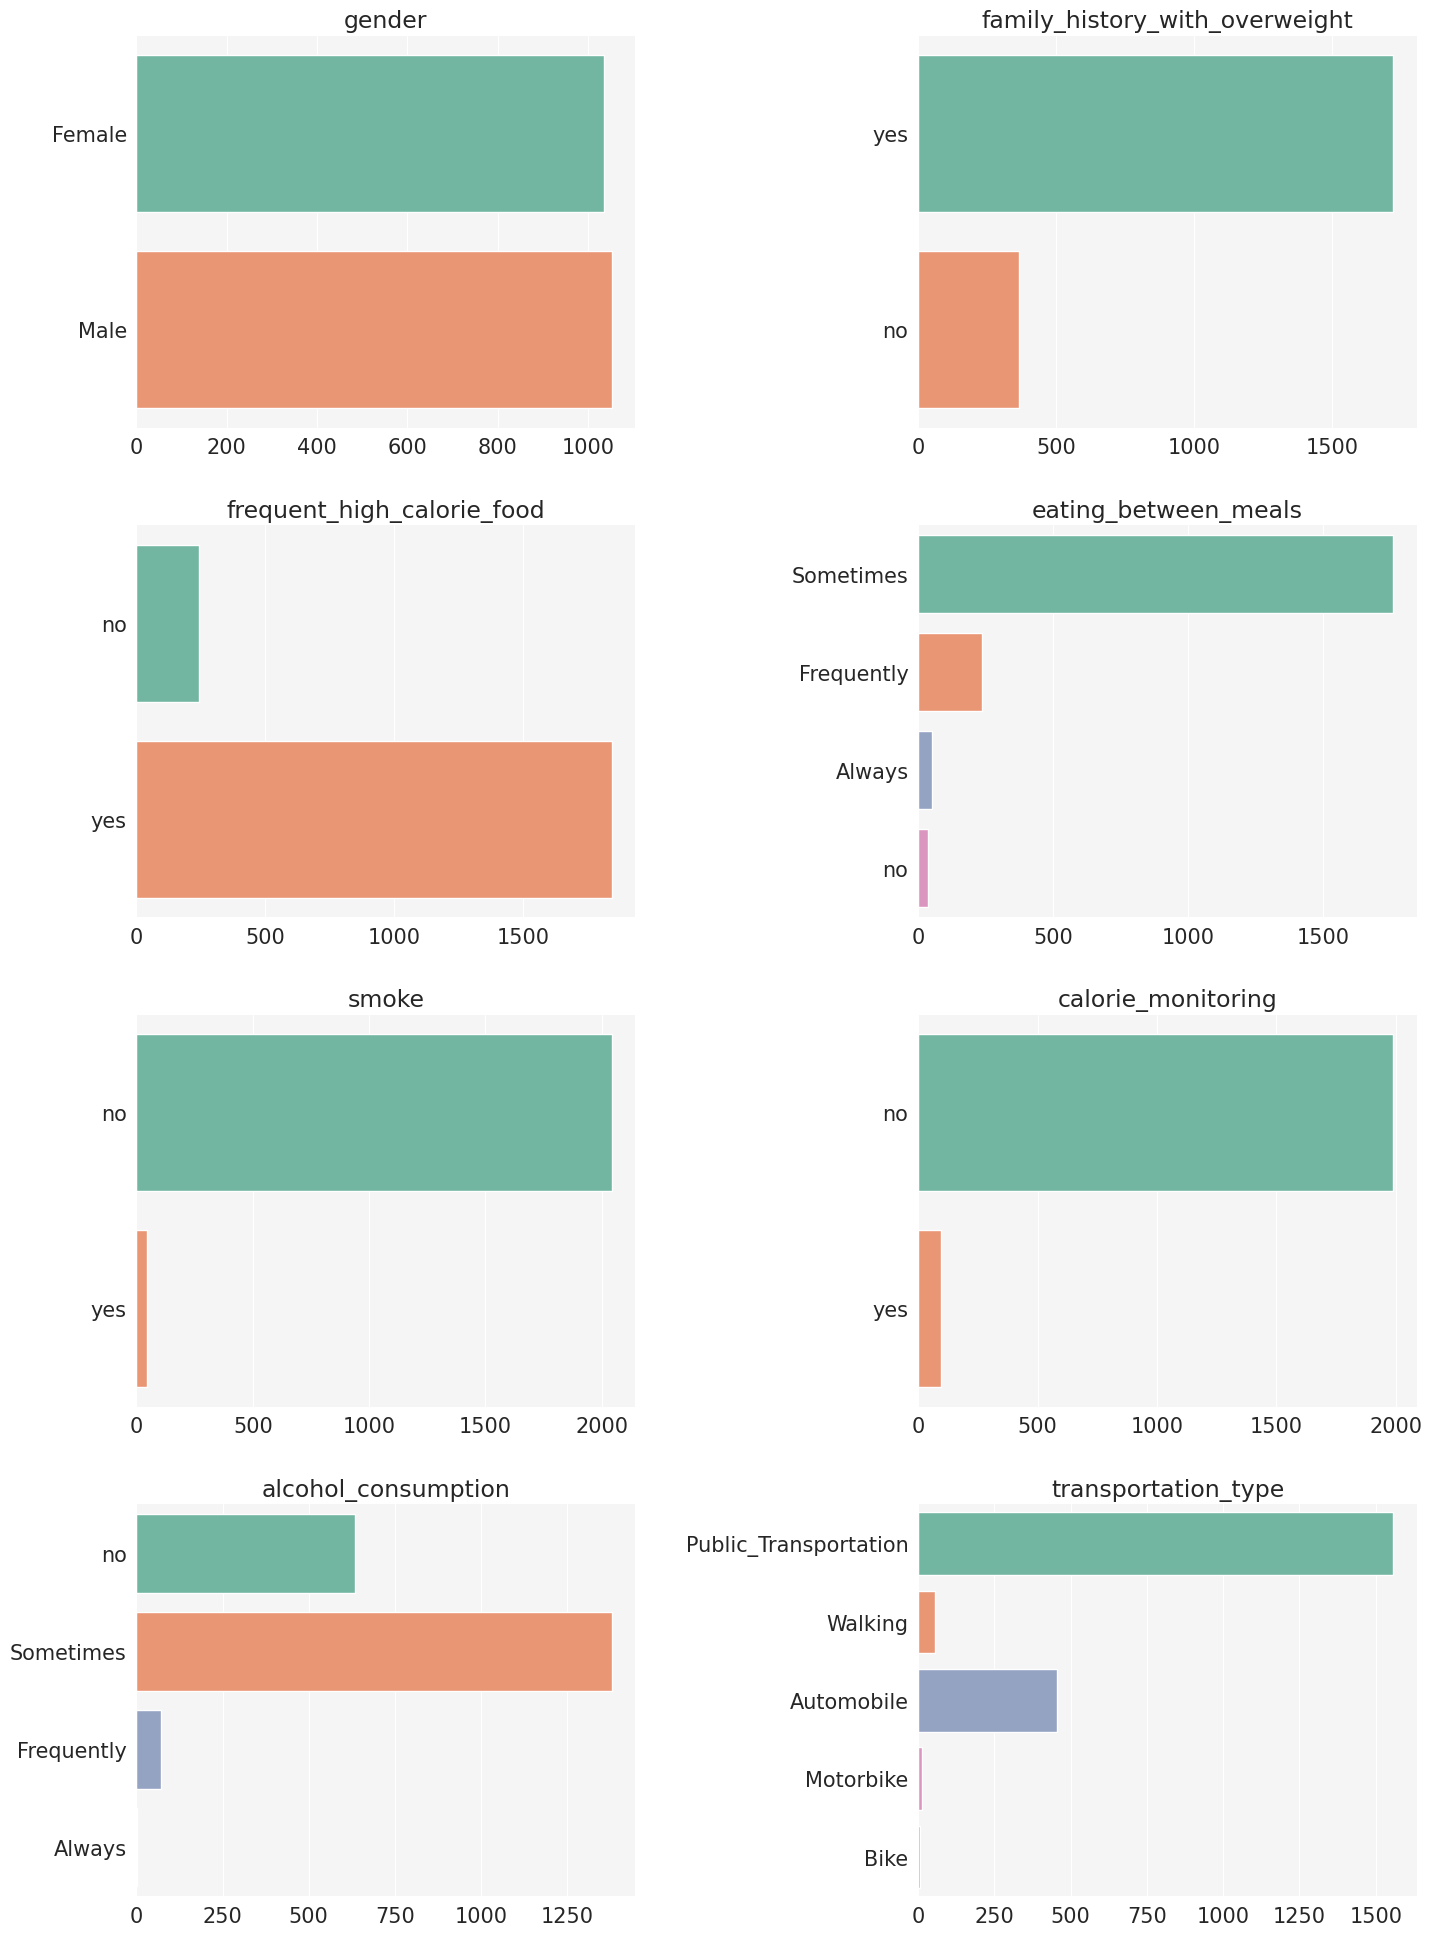

In [16]:
# Select categorical features
features = bmi_raw.select_dtypes(include='object').columns  

ncols = 2
nrows = math.ceil(len(features)/ncols)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))
axes = axes.flatten()  

for i, feature in enumerate(features):
    sns.countplot(
        y=feature,
        data=bmi_raw,
        hue=feature,
        palette=sns.color_palette("Set2"),
        ax=axes[i]
    )
    axes[i].set_title(feature,fontsize=17)
    axes[i].set_xlabel("")   
    axes[i].set_ylabel("")   
    axes[i].tick_params(axis='x', labelsize=15)  
    axes[i].tick_params(axis='y', labelsize=15)
    sns.despine(ax=axes[i])

plt.tight_layout(pad=3.0)
plt.show()

There are sparse classes within "alcohol_consumption" and "transportation_type" variables while "smoke" and "calorie_monitoring" variables are imbalanced.

In [17]:
# join sparse classes
bmi_raw.replace({
    'alcohol_consumption': {'Always': 'Frequently'},
    'transportation_type': {
        'Automobile': 'Vehicle',
        'Motorbike': 'Vehicle',
        'Walking': 'Self_Propelled',
        'Bike': 'Self_Propelled'
    }
}, inplace=True)


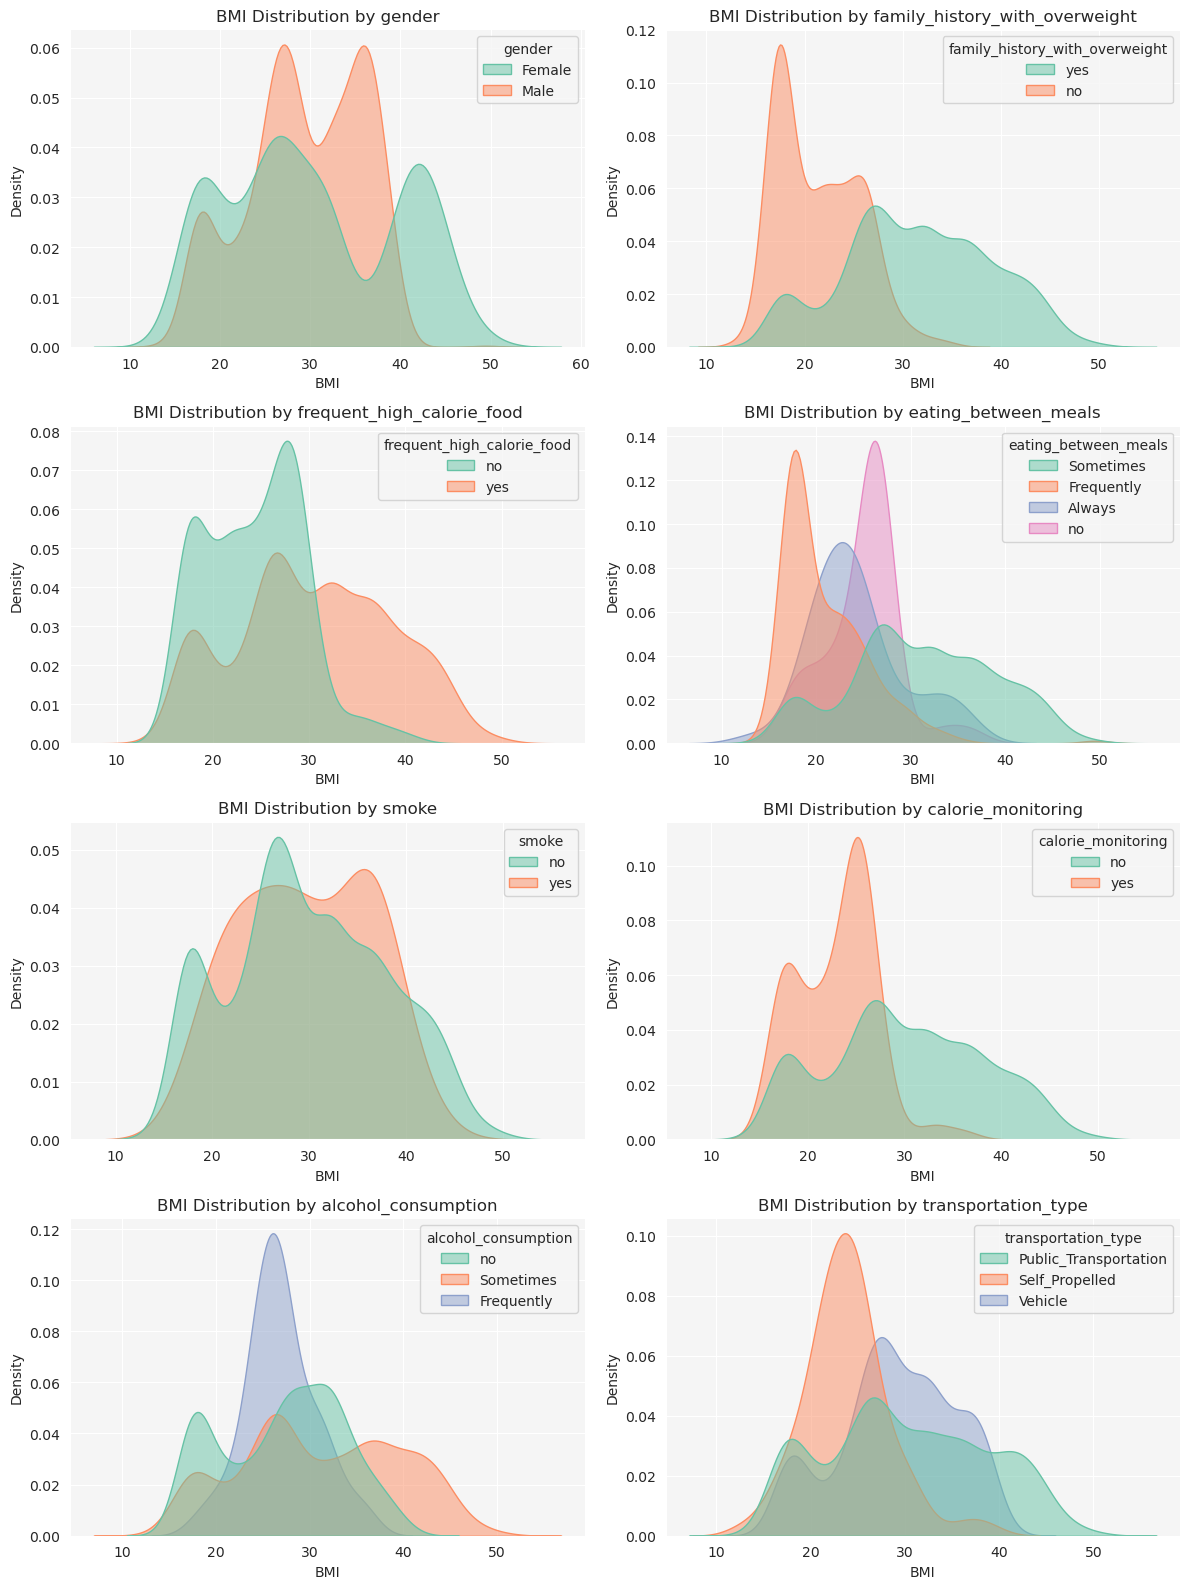

In [18]:
n_cols = 2
n_rows = math.ceil(len(features)/n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows*4))

for ax, col in zip(axes.flatten(), features):
    sns.kdeplot(
        data=bmi_raw,
        x='bmi',
        hue=col,
        fill=True,
        common_norm=False,
        alpha=0.5,
        palette="Set2",
        ax=ax
    )
    ax.set_title(f'BMI Distribution by {col}')
    ax.set_xlabel('BMI')
    ax.set_ylabel('Density')

for ax in axes.flatten()[len(features):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()


While calorie_monitoring is imbalanced, it shows a clear difference in how its classes relate to bmi. In contrast, the smoke classes have nearly identical BMI distributions.

In [19]:
smoke_yes = bmi_raw[bmi_raw['smoke'] == 'yes']['bmi']
smoke_no  = bmi_raw[bmi_raw['smoke'] == 'no']['bmi']

# check level of statistical difference in BMI distributions
u_stat, p_value = stats.mannwhitneyu(smoke_yes, smoke_no, alternative='two-sided')

print(f"P-value: {p_value:.3f}")

P-value: 0.969


In [20]:
bmi_raw = bmi_raw.drop(columns=['smoke'])
bmi_raw.columns

Index(['gender', 'age', 'family_history_with_overweight',
       'frequent_high_calorie_food', 'vegetable_consumption_freq',
       'main_meals_per_day', 'eating_between_meals', 'water_intake',
       'calorie_monitoring', 'physical_activity_freq', 'screen_time',
       'alcohol_consumption', 'transportation_type', 'bmi'],
      dtype='object')

In [21]:
# Encoding binary vaiables
bmi_raw['gender'] = bmi_raw['gender'].map({'Male': 1, 'Female': 0})
bmi_raw['family_history_with_overweight'] = bmi_raw['family_history_with_overweight'].map({'yes': 1, 'no': 0})
bmi_raw['frequent_high_calorie_food'] = bmi_raw['frequent_high_calorie_food'].map({'yes': 1, 'no': 0})
bmi_raw['calorie_monitoring'] = bmi_raw['calorie_monitoring'].map({'yes': 1, 'no': 0})

In [22]:
# Dummy variable encoding 
bmi_raw = pd.get_dummies(bmi_raw, 
               columns=["eating_between_meals", 
                        "alcohol_consumption", 
                        "transportation_type"]).astype(int)

In [23]:
bmi_raw.head()

,gender,age,family_history_with_overweight,frequent_high_calorie_food,vegetable_consumption_freq,main_meals_per_day,water_intake,calorie_monitoring,physical_activity_freq,screen_time,...,eating_between_meals_Always,eating_between_meals_Frequently,eating_between_meals_Sometimes,eating_between_meals_no,alcohol_consumption_Frequently,alcohol_consumption_Sometimes,alcohol_consumption_no,transportation_type_Public_Transportation,transportation_type_Self_Propelled,transportation_type_Vehicle
0,0,21,1,0,2,3,2,0,0,1,...,0,0,1,0,0,0,1,1,0,0
1,0,21,1,0,3,3,3,1,3,0,...,0,0,1,0,0,1,0,1,0,0
2,1,23,1,0,2,3,2,0,2,1,...,0,0,1,0,1,0,0,1,0,0
3,1,27,0,0,3,3,2,0,2,0,...,0,0,1,0,1,0,0,0,1,0
4,1,22,0,0,2,1,2,0,0,0,...,0,0,1,0,0,1,0,1,0,0


In [24]:
# Saving cleaned and transformed dataset
bmi_raw.to_csv('analytical_base_table.csv', index=None)